In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, TextVectorization

# RNN

In [2]:
# Generate some example sequential data
import numpy as np
# Create a simple sine wave dataset
def create_sine_wave_dataset(seq_length=100):
    x = np.linspace(0, 50, seq_length)
    y = np.sin(x)
    return y

data = create_sine_wave_dataset()
time_steps = np.arange(len(data))

In [3]:
# Prepare the dataset
def prepare_data(data, time_steps, time_window):
    X, Y = [], []
    for i in range(len(data) - time_window):
        X.append(data[i:i + time_window])
        Y.append(data[i + time_window])
    return np.array(X), np.array(Y)

time_window = 10
X, Y = prepare_data(data, time_steps, time_window)

In [4]:
# Reshape the data to match RNN input shape
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(time_window, 1)),
    Dense(1)
])

c:\Users\everton.bandeira\AppData\Local\pypoetry\Cache\virtualenvs\imb-ai-engineering-YFLZBaaa-py3.10\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2657  
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1850 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1204 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0686 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0428 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0355 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0135 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5374e-04 
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.1112e-04 
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.9727e-04 
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9954e-04 
Epoch 16/20
6/6 ━

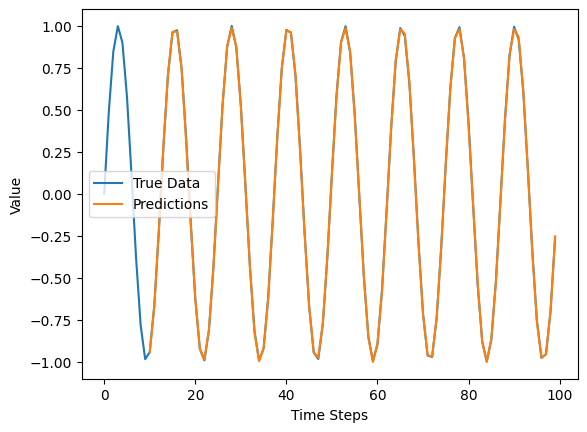

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, Y, epochs=20, batch_size=16)

# Make predictions
predictions = model.predict(X)

# Plot the results
import matplotlib.pyplot as plt

plt.plot(time_steps, data, label='True Data')
plt.plot(time_steps[time_window:], predictions, label='Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

# LSTM model

In [6]:
# Build the LSTM model
lstm_model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_window, 1)),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
lstm_model.fit(X, Y, epochs=20, batch_size=16)

# Make predictions
lstm_predictions = lstm_model.predict(X)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4778  
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4828 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4433 
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3673 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3849 
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3036 
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2337 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0863 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0171 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0082 
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0021     
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 
Epoch 15/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012     
Epoch 16/20
6/6 ━━━━━━━━━

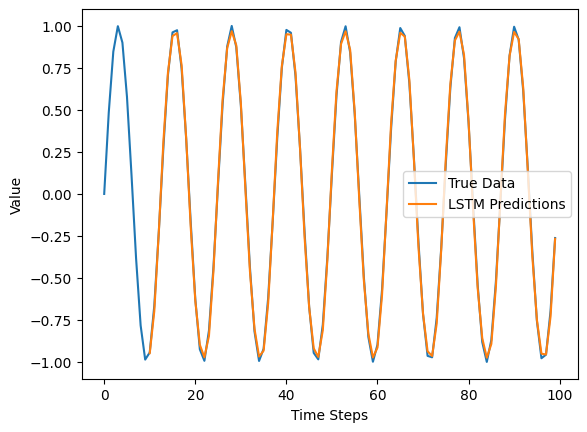

In [7]:
# Plot the results
plt.plot(time_steps, data, label='True Data')
plt.plot(time_steps[time_window:], lstm_predictions, label='LSTM Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

# Text Preprocessing

In [9]:
# Sample text data
texts = [
    "Hello, how are you?",
    "I am fine, thank you.",
    "How about you?",
    "I am good too."
]

# Define the TextVectorization layer
vectorizer = TextVectorization(output_mode='int', max_tokens=100,
                               output_sequence_length=10)

In [17]:
# adapt the vectorizer to the text data
vectorizer.adapt(texts)

# Vectorize the text data
text_vectorized = vectorizer(texts)
print('Vectorized text data:\n', text_vectorized.numpy())

Vectorized text data:
 [[ 8  4 11  2  0  0  0  0  0  0]
 [ 3  5 10  7  2  0  0  0  0  0]
 [ 4 12  2  0  0  0  0  0  0  0]
 [ 3  5  9  6  0  0  0  0  0  0]]
